# **Heart Failure Prediction**
<br>

## What is heart failure?
<br>
The term "heart failure" can be frightening. It doesn't mean the heart has "failed" or stopped working. It means the heart doesn't pump as well as it should.

Heart failure is a major health problem in the United States, affecting about 5.7 million Americans. About 550,000 new cases of heart failure occur each year. It's the leading cause of hospitalization in people older than 65.

If you have heart failure, you'll enjoy better health and quality of life if you take care of yourself and keep yourself in balance. It's important to learn about heart failure, how to keep in good balance, and when to call the doctor.
<br>
<br>

<img src="https://www.narayanahealth.org/sites/default/files/pillar-page/heart-failure-banner-bg.jpg" width="450">

## What are the types of heart failure?

There are many causes of heart failure, but the condition is generally broken down into two types:

Heart failure with reduced left ventricular function (HF-rEF)
The lower left chamber of the heart (left ventricle) gets bigger (enlarges) and cannot squeeze (contract) hard enough to pump the right amount of oxygen-rich blood to the rest of the body.

Heart failure with preserved left ventricular function (HF-pEF)
The heart contracts and pumps normally, but the bottom chambers of the heart (ventricles) are thicker and stiffer than normal. Because of this, the ventricles can't relax properly and fill up all the way. Because there's less blood in the ventricles, less blood is pumped out to the rest of the body when the heart contracts.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Firstly We need to download the dataset to use. We can find a lot of datasets on [Kaggle](https://www.kaggle.com/)

Dataset used -> https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/andrewmvd/heart-failure-clinical-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\heart-failure-clinical-data" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './heart-failure-clinical-data'

In [5]:
import os
os.listdir(data_dir)

['heart_failure_clinical_records_dataset.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "heart-failure-prediction" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debg48/heart-failure-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debg48/heart-failure-prediction


'https://jovian.ai/debg48/heart-failure-prediction'

## Data Preparation and Cleaning

> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data


First we will import Numpy and Pandas libraries

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.

In [10]:
import numpy as np
import pandas as pd

In [11]:
heart_failure_df = pd.read_csv(data_dir + '/heart_failure_clinical_records_dataset.csv')

Pandas read_csv() function imports a CSV file to DataFrame format

In [12]:
heart_failure_df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The head() function returns the first n rows for the object based on position. It is useful for quickly testing if our object has the right type of data in it.
<br>
<br>

In [13]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [14]:
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [15]:
heart_failure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA

sum() function return the sum of the values for the requested axis

So as we can see there are no missing values in our dataframe and we can proceed with our data analysis

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debg48/heart-failure-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debg48/heart-failure-prediction


'https://jovian.ai/debg48/heart-failure-prediction'

## Exploratory Analysis and Visualization

> - Matplotlib - for visualization (Platting graphas)
> - Seaborn - for visualization (Platting beautiful graphas)
> - Explore distributions of numeric columns using histograms etc.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

First we plot the histograms of all the columns present in the dataset

The hist() function in pyplot module of matplotlib library is used to plot a histogram

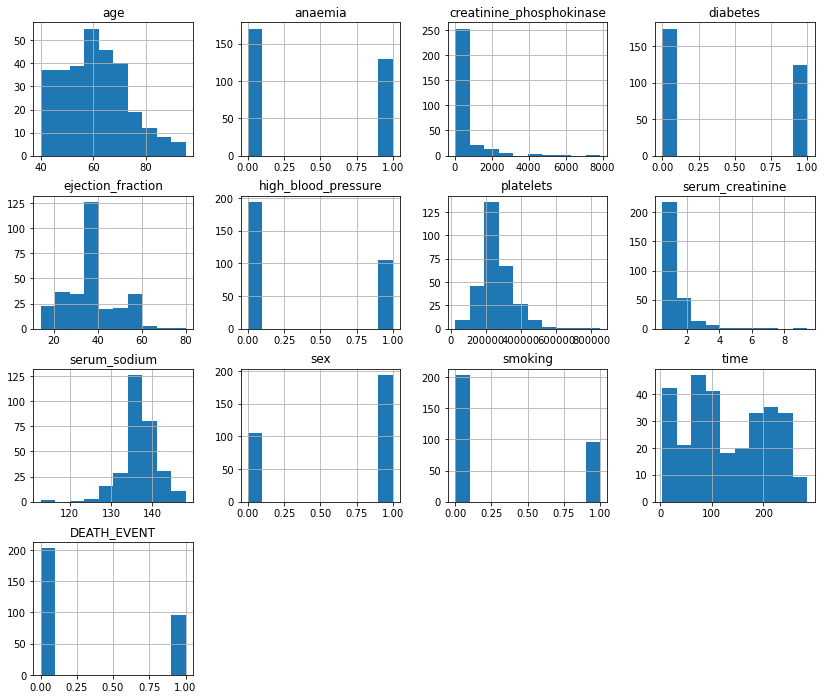

In [19]:
heart_failure_df.hist(figsize = (14,12))
plt.show()

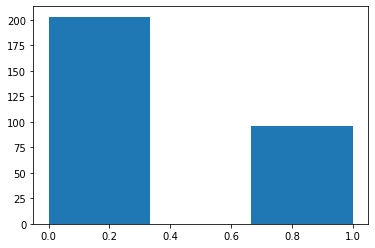

In [20]:
plt.hist(heart_failure_df.DEATH_EVENT,bins=3);

As we can see the dataset is unbalanced there are more survival cases than deaths

Let us see the correlation between various variables in the dataset 

countplot() method is used to Show the counts of observations in each categorical bin using bars.

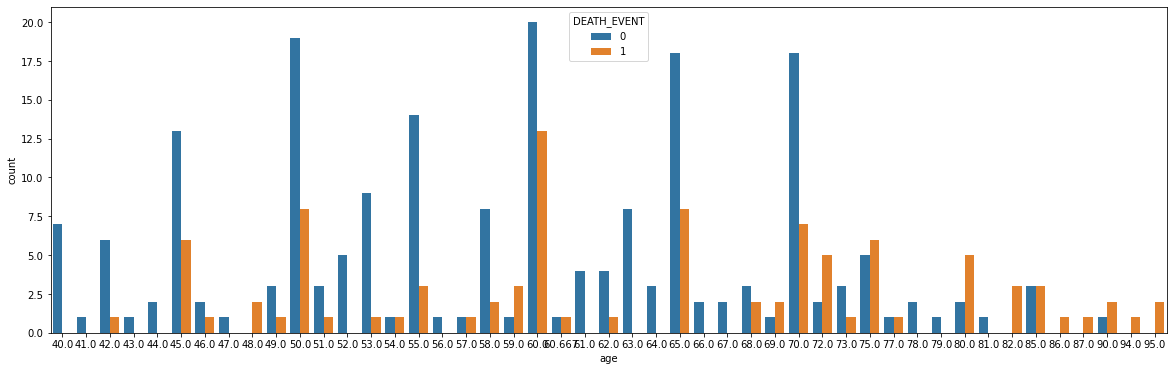

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x ="age", hue ="DEATH_EVENT", data=(heart_failure_df));

As we can see the maximum death event is recorded at the age of 60

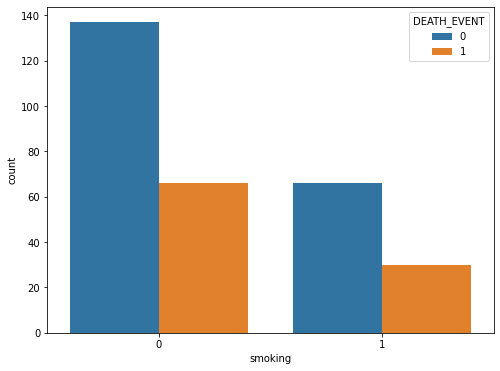

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x ="smoking", hue ="DEATH_EVENT", data=(heart_failure_df));

This data suggest that death in smokers due to heart failure is less than that of death in non-smokers due to heart failure

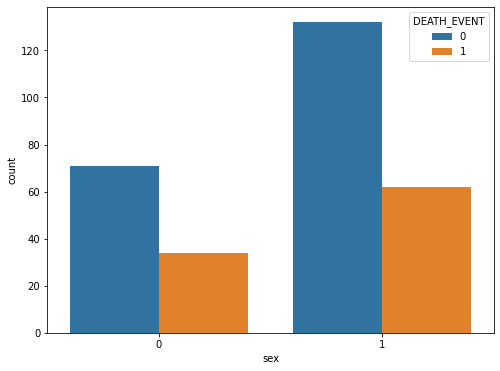

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x ="sex", hue ="DEATH_EVENT", data=(heart_failure_df));

In this dataset female is denoted by 0 and is denoted by 1

As we can see male have higher risk of heart failure than female

Ejection fraction is a measurement of the percentage of blood leaving your heart each time it squeezes (contracts). It is just one of many tests your doctor may use to determine how your heart works.

Now let us do a scatterplot between platelets and ejection fraction

Matplot has a built-in function to create scatterplots called scatterplot()

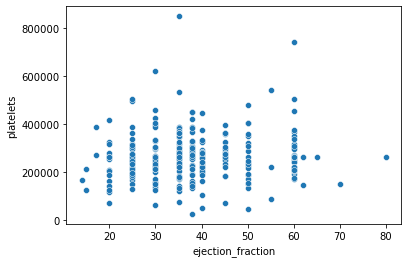

In [24]:
sns.scatterplot(x=heart_failure_df['ejection_fraction'], y=heart_failure_df['platelets']);

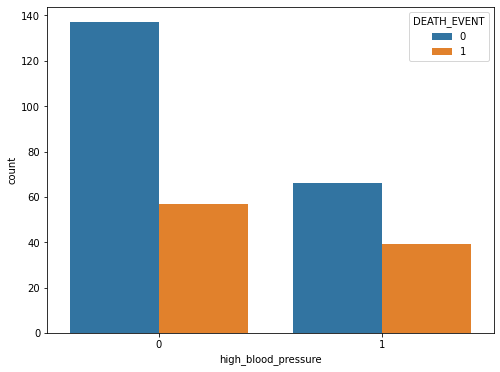

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x ="high_blood_pressure", hue ="DEATH_EVENT", data=(heart_failure_df));

According to the dataset people with high blood pressure have a lower risk of heart failure,however in real life high blood pressure (HBP or hypertension) increases your risk of developing heart failure.

Let us save and upload our work to Jovian before continuing

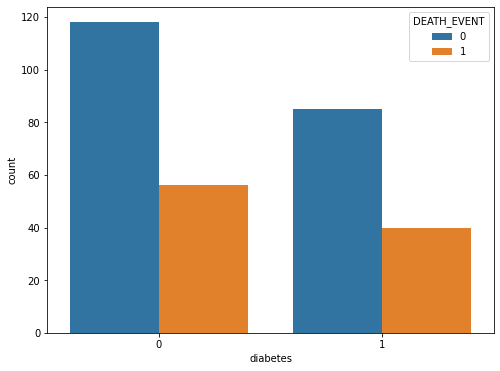

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x ="diabetes", hue ="DEATH_EVENT", data=(heart_failure_df));

According to the dataset people with diabetes have a lower risk of heart failure but in real life Adults with diabetes are nearly twice as likely to have heart disease or stroke as adults without diabetes

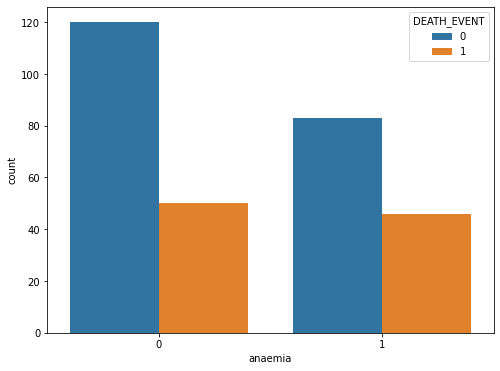

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x ="anaemia", hue ="DEATH_EVENT", data=(heart_failure_df));

The dataset suggests that people with anemia have less risk of heart failure but in real life anemia itself can worsen cardiac function, both because it causes cardiac stress through tachycardia and increased stroke volume, and because it can cause a reduced renal blood flow and fluid retention, adding further stress to the heart.

Creatine phosphokinase (CPK) is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle.
When the total CPK level is very high, it most often means there has been injury or stress to muscle tissue, the heart, or the brain. Muscle tissue injury is most likely. When a muscle is damaged, CPK leaks into the bloodstream. Finding which specific form of CPK is high helps determine which tissue has been damaged.

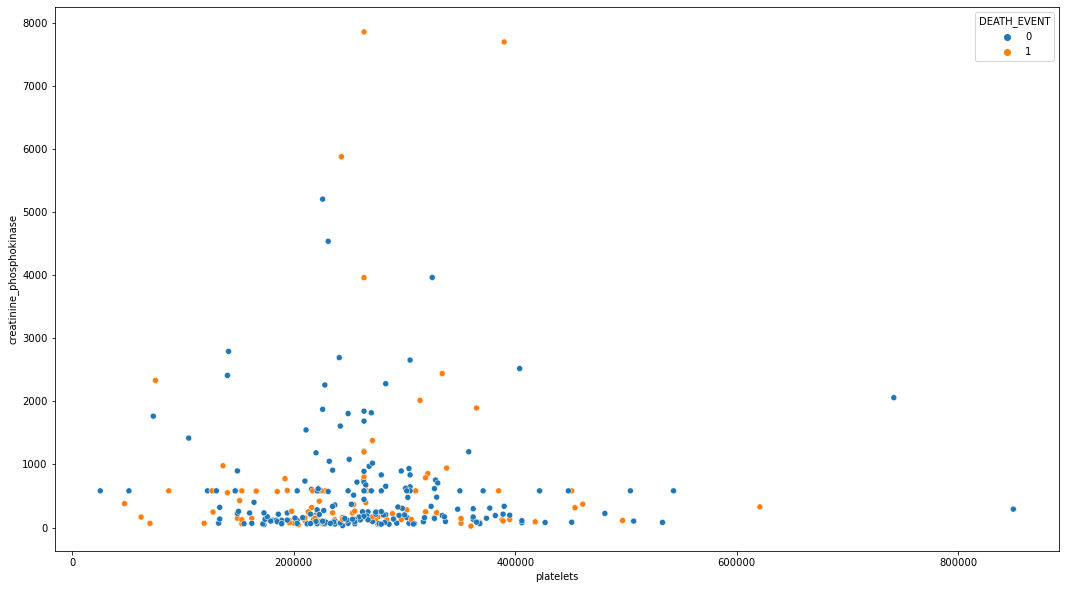

In [92]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='platelets', y= 'creatinine_phosphokinase',hue='DEATH_EVENT',data=heart_failure_df);

From the above plot, we can infer that with increased level of creatinine phosphokinase there is increased risk of heart failure

Elevated creatinine level signifies impaired kidney function or kidney disease. Patients with severe heart failure, particularly those on large doses of diuretics for long periods, may have elevated BUN and creatinine levels indicative of renal insufficiency owing to chronic reductions of renal blood flow from reduced cardiac output

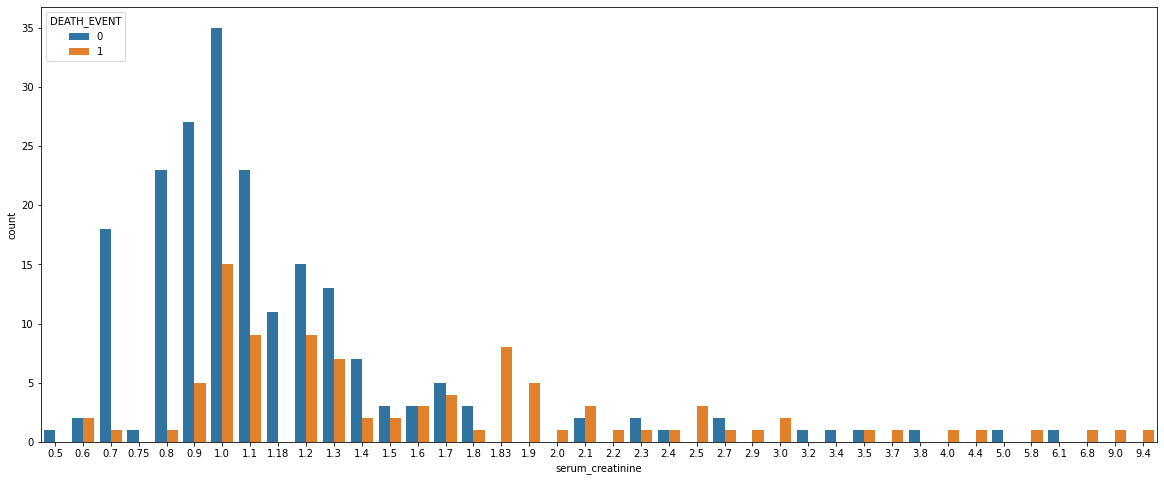

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(x ="serum_creatinine", hue ="DEATH_EVENT", data=(heart_failure_df));

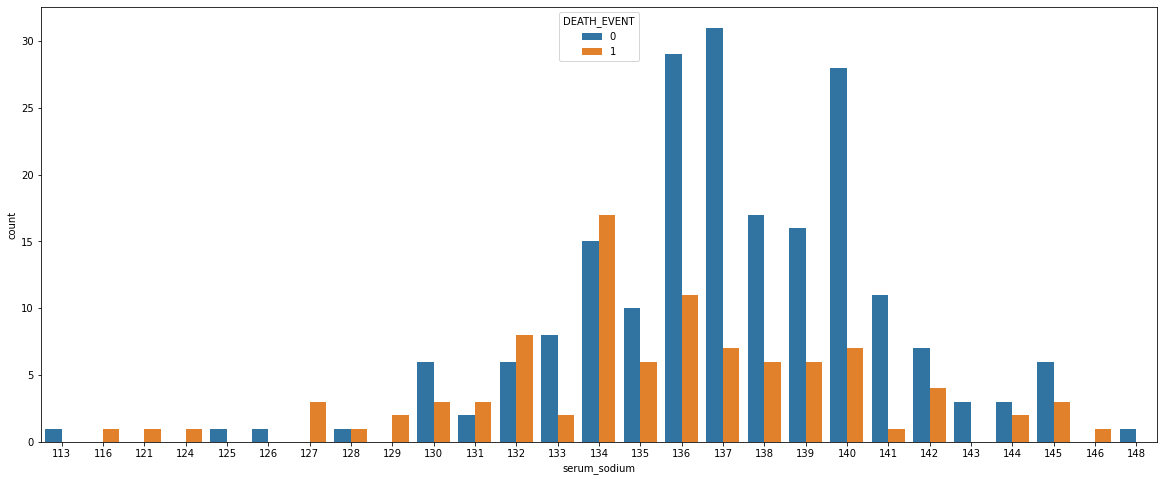

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x ="serum_sodium", hue ="DEATH_EVENT", data=(heart_failure_df));

We can observe that increased serum sodium indicates greater risk of heart failure

Hyponatremia or low serum sodium level is typically defined as a serum sodium concentration of <135 mEq/L and is one of the most common biochemical disorders featured in heart failure patients


In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debg48/heart-failure-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debg48/heart-failure-prediction


'https://jovian.ai/debg48/heart-failure-prediction'

## Asking and Answering Questions

> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn


#### Q1: What are the total number of Deaths recorded due to Heart failure? (Find the fatality rate as well) 

In [39]:
hf_death_df=heart_failure_df[heart_failure_df.DEATH_EVENT==1]

In [45]:
deaths=len(hf_death_df.DEATH_EVENT)

Hence total deaths were 96

In [46]:
cases=len(heart_failure_df.DEATH_EVENT)

Total Cases in the dataset is 299

In [48]:
fatality_rate=deaths/cases
fatality_rate

0.3210702341137124

Fatality Rate is 0.3210702341137124

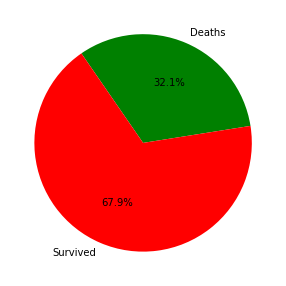

In [54]:
survived=cases-deaths
labels=['Deaths','Survived']
color= ['green','red']
sizes =[deaths,survived]
plt.figure(figsize= (15,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, colors = color);

The pie() function in the pyplot module of matplotlib is used to create a pie chart representing the data in an array

#### Q2: What are the chances that a smoker will have the risk of dying due to heart failure?

In [59]:
smoker_death_df=hf_death_df[hf_death_df.smoking==1]

In [60]:
smoker_deaths=len(smoker_death_df.DEATH_EVENT)
smoker_deaths

30

30 Smokers died due to heart failure

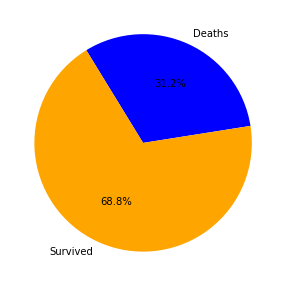

In [64]:
smokers_survived=deaths-smoker_deaths
labels=['Deaths','Survived']
color= ['blue','orange']
sizes =[smoker_deaths,smokers_survived]
plt.figure(figsize= (15,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, colors = color);

#### Q3: What are the chances that a person with high blood pressure will have the risk of dying due to heart failure?

In [65]:
hbp_death_df=hf_death_df[hf_death_df.high_blood_pressure==1]

In [66]:
hbp_deaths=len(hbp_death_df.DEATH_EVENT)
hbp_deaths

39

39 people with High Blood Pressure died due to Heart Failure

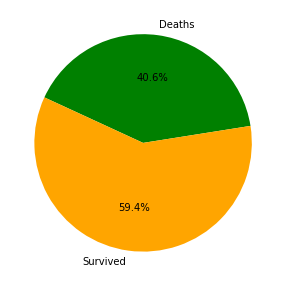

In [67]:
hbp_survived=deaths-hbp_deaths
labels=['Deaths','Survived']
color= ['green','orange']
sizes =[hbp_deaths,hbp_survived]
plt.figure(figsize= (15,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, colors = color);

#### Q4: Between Male and Female who has a greater risk of Heart Failure?

In [79]:
male_df=heart_failure_df[heart_failure_df.sex==1]
female_df=heart_failure_df[heart_failure_df.sex==0]

In [80]:
len(male_df)

194

In [81]:
len(female_df)

105

Male have a slight greater risk of heart failure than female

In [86]:
male_death_df=male_df[male_df.DEATH_EVENT==1]
female_death_df=female_df[female_df.DEATH_EVENT==1]

male_fatality=len(male_death_df)/len(male_df)
female_fatality=len(female_death_df)/len(female_df)

In [87]:
male_fatality

0.31958762886597936

In [88]:
female_fatality

0.3238095238095238

Female Fatality rate is slightly greater than Male Fatality rate

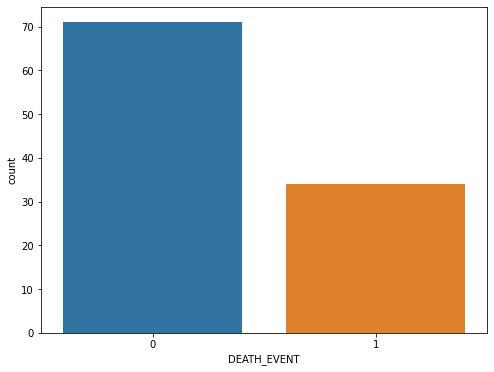

In [90]:
plt.figure(figsize=(8,6))
sns.countplot(x ="DEATH_EVENT", data=(female_df));

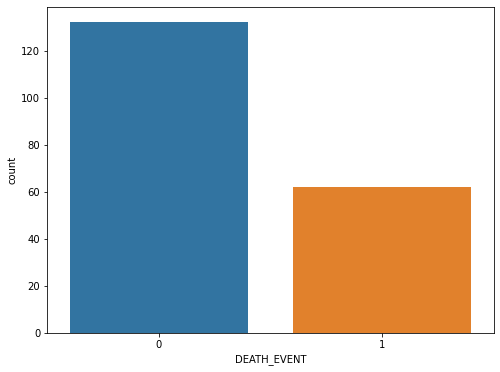

In [91]:
plt.figure(figsize=(8,6))
sns.countplot(x ="DEATH_EVENT", data=(male_df));

#### Q5: At which age does a person have the highest risk of Heart Failure?

In [99]:
heart_failure_df.age.mode()

0    60.0
dtype: float64

At the age of 60 a person has the highest risk of Heart Failure

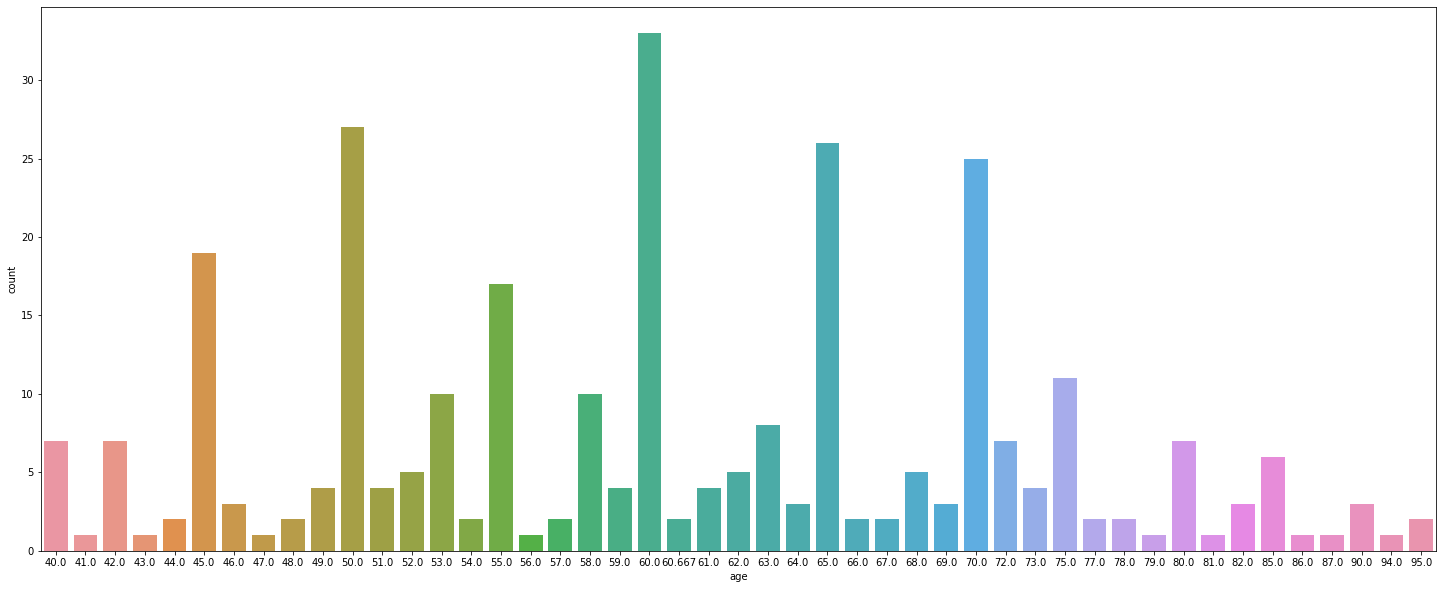

In [103]:
plt.figure(figsize=(25,10))
sns.countplot(x ="age",data=(heart_failure_df));

Let us save and upload our work to Jovian before continuing.

In [104]:
import jovian

In [105]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debg48/heart-failure-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debg48/heart-failure-prediction


'https://jovian.ai/debg48/heart-failure-prediction'

## Inferences and Conclusion

> - For a person with heart failure there is a 32.1% chance of dying
> - A smoker has a 31.2% chance of dying due to Heart Failure
> - A person with high blood pressure has a 40.6% chance of dying due to heart failure
> - Male have a slight greater risk of heart failure than female
> - At the age of 60 a person has the highest risk of Heart Failure

In [106]:
import jovian

In [107]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debg48/heart-failure-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debg48/heart-failure-prediction


'https://jovian.ai/debg48/heart-failure-prediction'

## References

> - Heart Failure - [Cleaveland Clinic](https://my.clevelandclinic.org/health/diseases/17069-heart-failure-understanding-heart-failure)
> - [Numpy](https://numpy.org/)
> - [Pandas](https://mode.com/python-tutorial/libraries/pandas/)
> - [Matplotlib](https://matplotlib.org/)
> - [Seaborn](https://seaborn.pydata.org/)
> - [GeekforGeeks](https://www.geeksforgeeks.org/)
> - [w3schools](https://www.w3schools.com/)
> - [Tutorialpoint](https://www.tutorialspoint.com/index.htm)

### Future Work

The variables did not seem to have a great corelation. We might try using classification algorithms like KNN or Random Forest to see how the results turn out to be.


In [108]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "debg48/heart-failure-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/debg48/heart-failure-prediction


'https://jovian.ai/debg48/heart-failure-prediction'